# Apples & Networks

Quite helpful: [tensorflow and time series forecasting](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en#1_indexes_and_offsets)

In [837]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

## Inspect and cleanup

In [838]:
# NOT FINAL ?

selected_variables = [
    "Percentuale_Apertura_Valvola_Miscelatrice",
    "Percentuale_Velocita_Ventilatori",
    "Pompa_Avviamenti_Giornalieri",
    "Pompa_Glicole_Marcia",
    "Postventilazione",
    "Preventilazione",
    "Raffreddamento",
    "Sbrinamento_Acqua",
    "Sbrinamento_Acqua_Avviamenti",
    "Sgocciolamento_Dopo_Sbrinamento_Acqua",
    "Temperatura_Cella_Mediata",
    "Temperatura_Celle",
    "Temperatura_Mandata_Glicole",
    "Temperatura_Mandata_Glicole_Nominale",
    "Temperatura_Ritorno_Glicole",
    "Umidita_Relativa",
    "Valvola_Sbrinamento_Acqua_Aperta",
    "Ventilatore_Avviamenti_Giornalieri",
    "Ventilatore_Marcia"
]

In [839]:
n_cella = 13  # cell on which we're working on

target = "Temperatura_Celle"


df = pd.read_csv(f'all_cells/Cella_{n_cella}.csv')

df = df.loc[:, ~df.columns.str.contains('Date')]  # remove the 'Date' column

df = df.replace({',': '.'}, regex=True).astype(float)  # convert everything in float, to be sure

df.columns = [l.replace(f'Cella{n_cella}', '') for l in df.columns]  # Way prettier names
df.columns = [re.sub(r"(\w)([A-Z])", r"\1_\2", l) for l in df.columns]

df = df[selected_variables]  # select the only variables we want to use

In [840]:
df.describe().transpose()   # a quick glance at our variables

,count,mean,std,min,25%,50%,75%,max
Percentuale_Apertura_Valvola_Miscelatrice,10746.0,9.405570,16.888026,0.0000,0.0000,0.0,0.000,78.2562
Percentuale_Velocita_Ventilatori,10746.0,25.125628,43.375577,0.0000,0.0000,0.0,100.000,100.0000
Pompa_Avviamenti_Giornalieri,10746.0,1.182487,0.677577,0.0000,1.0000,1.0,2.000,3.0000
Pompa_Glicole_Marcia,10746.0,0.243253,0.429067,0.0000,0.0000,0.0,0.000,1.0000
Postventilazione,10746.0,0.001489,0.038560,0.0000,0.0000,0.0,0.000,1.0000
Preventilazione,10746.0,0.006142,0.078132,0.0000,0.0000,0.0,0.000,1.0000
Raffreddamento,10746.0,0.243346,0.429122,0.0000,0.0000,0.0,0.000,1.0000
Sbrinamento_Acqua,10746.0,0.026056,0.159310,0.0000,0.0000,0.0,0.000,1.0000
Sbrinamento_Acqua_Avviamenti,10746.0,0.285036,0.451453,0.0000,0.0000,0.0,1.000,1.0000
Sgocciolamento_Dopo_Sbrinamento_Acqua,10746.0,0.006514,0.080450,0.0000,0.0000,0.0,0.000,1.0000


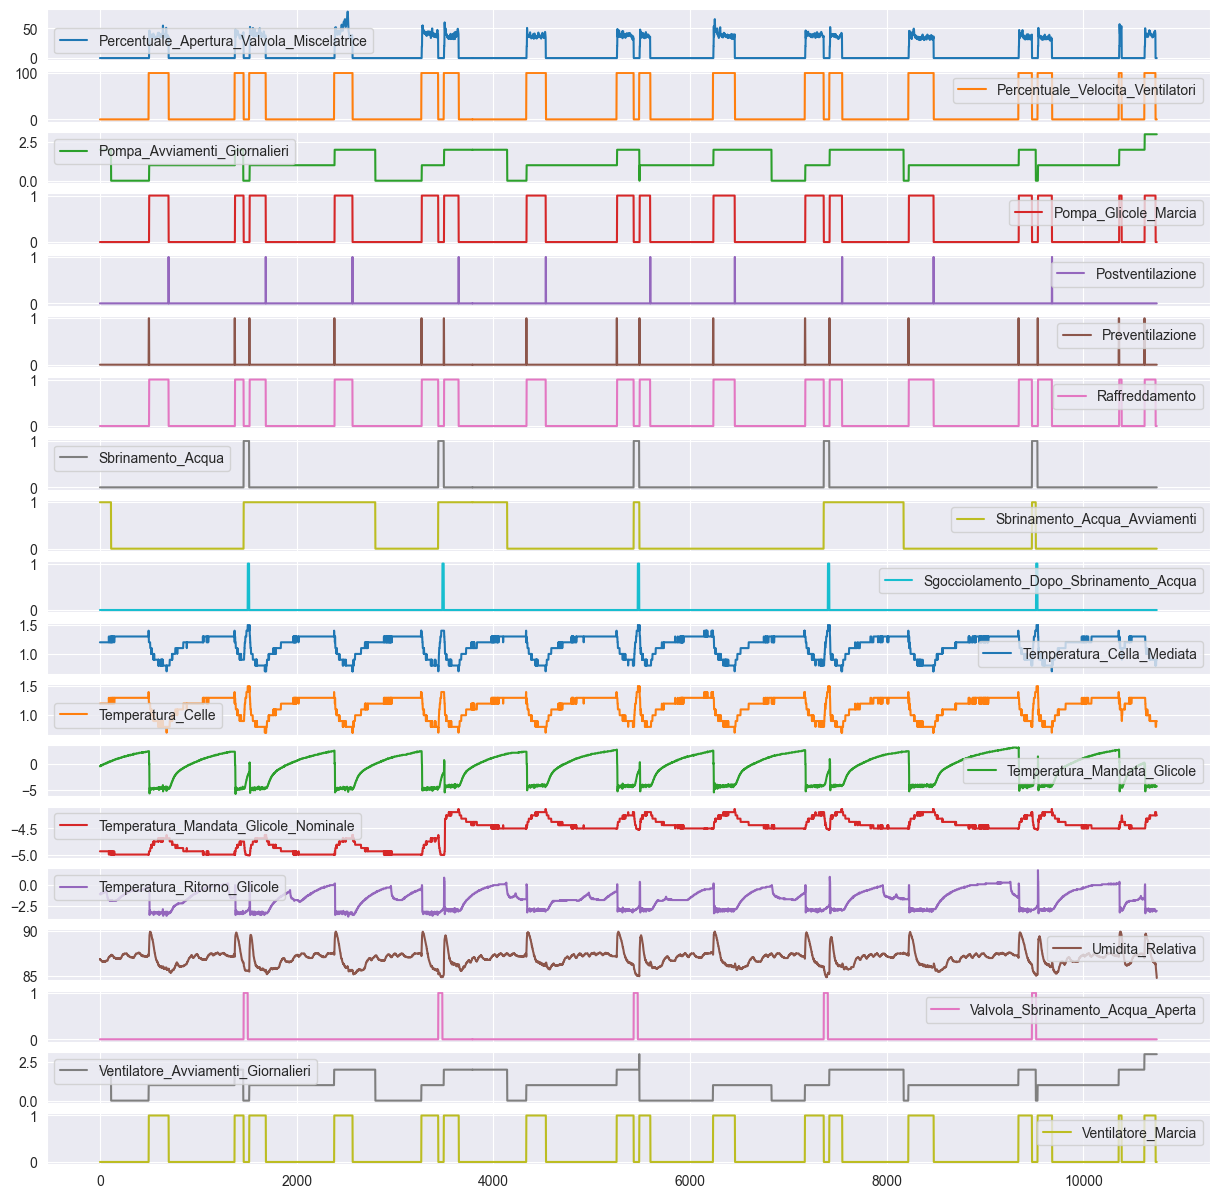

In [841]:
df.plot(subplots=True, figsize=(15, 15))  # a quick glance at our variables - part 2

plt.show()

In [842]:
# Drop NA rows

na_ids = set()

for col in df.columns:

    if df[col].isnull().values.any():
        df = df.drop(index = df.loc[df[col].isna()].index[0])

## Split and preprocess

In [843]:
# Split into train/validation/test

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

num_features = df.shape[1]

target = 'Percentuale_Apertura_Valvola_Miscelatrice'  # our target variable (to predict)

In [844]:
# Normalize all variables

scaler = StandardScaler()

train_df = pd.DataFrame(scaler.fit_transform(train_df.values), columns=df.columns)
val_df = pd.DataFrame(scaler.fit_transform(val_df.values), columns=df.columns)
test_df = pd.DataFrame(scaler.fit_transform(test_df.values), columns=df.columns)

Other preprocessing to do?

## Data windowing

In [845]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):

        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col=target, max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('time')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32, )

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [846]:
single_step_window = WindowGenerator(
    input_width=1,
    label_width=1,
    shift=1,
    label_columns=[target])

wide_window = WindowGenerator(
    input_width=6*60,
    label_width=6*60,
    shift=1*60,
    label_columns=[target])

In [847]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Linear NN model

In [848]:
# To compile and fit in one shot

def compile_and_fit(model, window, max_epochs, lr=1e-5):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(lr),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])

    return history

In [849]:
# Linear NN (just as baseline, to get started with)

linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, kernel_regularizer="l1")
])

history = compile_and_fit(linear, single_step_window, max_epochs=20)

val_score = linear.evaluate(single_step_window.val)
test_score = linear.evaluate(single_step_window.test, verbose=0)

print(f"Validation MSE: {val_score[0]}\tMAE: {val_score[1]}")
print(f"Validation MSE: {test_score[0]}\tMAE: {test_score[1]}")

Epoch 1/20
  6/236 [..............................] - ETA: 2s - loss: 3.5217 - mean_absolute_error: 1.3969 

2022-10-04 22:20:19.434507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


236/236 [==============================] - ETA: 0s - loss: 3.6811 - mean_absolute_error: 1.3616

2022-10-04 22:20:20.825338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


236/236 [==============================] - 2s 7ms/step - loss: 3.6811 - mean_absolute_error: 1.3616 - val_loss: 3.9905 - val_mean_absolute_error: 1.4520
Epoch 2/20
236/236 [==============================] - 1s 6ms/step - loss: 3.6166 - mean_absolute_error: 1.3469 - val_loss: 3.9207 - val_mean_absolute_error: 1.4382
Epoch 3/20
236/236 [==============================] - 1s 6ms/step - loss: 3.5534 - mean_absolute_error: 1.3325 - val_loss: 3.8518 - val_mean_absolute_error: 1.4250
Epoch 4/20
236/236 [==============================] - 1s 6ms/step - loss: 3.4912 - mean_absolute_error: 1.3183 - val_loss: 3.7844 - val_mean_absolute_error: 1.4124
Epoch 5/20
236/236 [==============================] - 1s 6ms/step - loss: 3.4302 - mean_absolute_error: 1.3044 - val_loss: 3.7180 - val_mean_absolute_error: 1.4000
Epoch 6/20
236/236 [==============================] - 1s 6ms/step - loss: 3.3708 - mean_absolute_error: 1.2910 - val_loss: 3.6529 - val_mean_absolute_error: 1.3880
Epoch 7/20
236/236 [=======

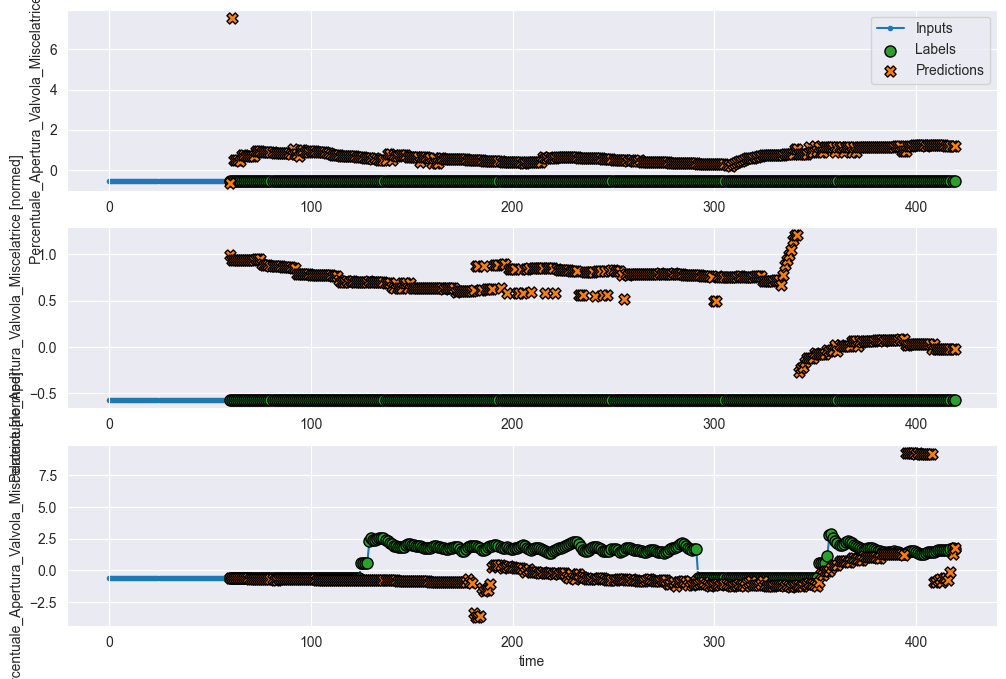

In [850]:
wide_window.plot(linear)  # 3 continuous 'chunks' from training are plotted (predictions against actual values) [I think]

## Recurrent NN model

In [851]:
# Recurrent NN

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window, max_epochs=20)

val_score = linear.evaluate(wide_window.val)
test_score = linear.evaluate(wide_window.test, verbose=0)

print(f"Validation MSE: {val_score[0]}\tMAE: {val_score[1]}")
print(f"Validation MSE: {test_score[0]}\tMAE: {test_score[1]}")

Epoch 1/20


2022-10-04 22:20:49.726865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-04 22:20:49.830875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-04 22:20:50.426810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - ETA: 0s - loss: 1.0322 - mean_absolute_error: 0.8080

2022-10-04 22:21:10.028674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-04 22:21:10.075312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - 25s 100ms/step - loss: 1.0322 - mean_absolute_error: 0.8080 - val_loss: 0.8936 - val_mean_absolute_error: 0.7306
Epoch 2/20
222/222 [==============================] - 19s 83ms/step - loss: 0.9659 - mean_absolute_error: 0.7800 - val_loss: 0.8323 - val_mean_absolute_error: 0.7038
Epoch 3/20
222/222 [==============================] - 19s 85ms/step - loss: 0.9114 - mean_absolute_error: 0.7554 - val_loss: 0.7841 - val_mean_absolute_error: 0.6786
Epoch 4/20
222/222 [==============================] - 18s 83ms/step - loss: 0.8678 - mean_absolute_error: 0.7329 - val_loss: 0.7469 - val_mean_absolute_error: 0.6554
Epoch 5/20
222/222 [==============================] - 19s 85ms/step - loss: 0.8339 - mean_absolute_error: 0.7123 - val_loss: 0.7185 - val_mean_absolute_error: 0.6344
Epoch 6/20
222/222 [==============================] - 19s 85ms/step - loss: 0.8081 - mean_absolute_error: 0.6938 - val_loss: 0.6972 - val_mean_absolute_error: 0.6157
Epoch 7/20
222

2022-10-04 22:27:08.146838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 0s 5ms/step - loss: 1.9886 - mean_absolute_error: 1.0233
Validation MSE: 1.9886095523834229	MAE: 1.0233101844787598
Validation MSE: 0.9711613655090332	MAE: 0.5083295106887817


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

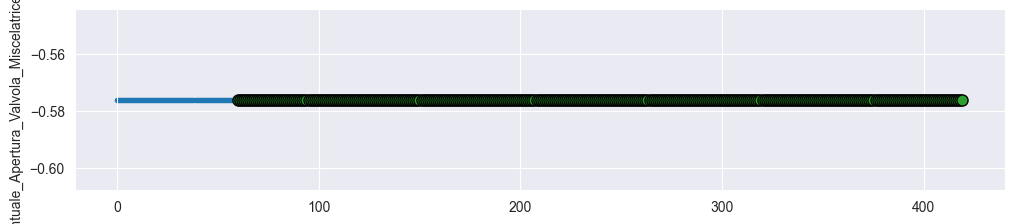

In [853]:
wide_window.plot(lstm_model)

# can't figure out why this one doesn't work